### Summary

1.Exploratory Data Analysis on NYC Taxi data <br>
2.Build a machine learning model to predict the duration of NYC taxi trip.

### Introduction

In this notebook, we will first study and visualise the data, engineer new features, and examine potential outliers.<br>
Finally, we will make a brief excursion into viewing this challenge as a classification problem and finish this notebook with a simple Ensemble model that provides a basic prediction.<br>
Dataset downloaded from : https://www.kaggle.com/code/neomatrix369/chaieda-nyc-taxi-trip-duration-analysis/input?select=train_test_extended.csv

### Libraries

In [1]:
#importing the python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
#from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import r2_score,classification_report, confusion_matrix, accuracy_score
from geopy.distance import geodesic
import time
from IPython.display import clear_output  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
#https://github.com/TanmayKedari/Exploratory-Analysis-of-NYC-Taxi/blob/master/NYC%20Taxi%20Trip%20Duration.ipynb

In [2]:
taxi_data = pd.read_csv('/Users/johnsiraniperiandavar/jupiter_dir/nyc/data/rideshare_data.csv')
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81763 entries, 0 to 81762
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              81763 non-null  int64  
 1   id                      81763 non-null  object 
 2   vendor_id               81763 non-null  int64  
 3   pickup_datetime         81763 non-null  object 
 4   dropoff_datetime        57199 non-null  object 
 5   passenger_count         81763 non-null  int64  
 6   pickup_longitude        81763 non-null  float64
 7   pickup_latitude         81763 non-null  float64
 8   dropoff_longitude       81763 non-null  float64
 9   dropoff_latitude        81763 non-null  float64
 10  store_and_fwd_flag      81763 non-null  object 
 11  trip_duration           57199 non-null  float64
 12  pickup_district         81763 non-null  object 
 13  pickup_neighbourhood    81763 non-null  object 
 14  dropoff_district        81763 non-null

### Data Exploration

In [3]:
taxi_data.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,dropoff_geonumber,day_period,month,year,season,weekday_or_weekend,regular_day_or_holiday,pickup_hour,day_name,financial_quarter
0,36,id1870624,1,2016-01-05 15:29:54,2016-01-05 15:39:07,3,-73.951515,40.770248,-73.958527,40.761517,...,23463.114456,2. Afternoon,01. Jan,2016,1. Winter,Weekday,Regular day,15,2. Tuesday,4
1,46,id3188770,1,2016-01-03 16:59:02,2016-01-03 17:04:50,1,-73.985138,40.732193,-73.989639,40.720875,...,23455.767822,2. Afternoon,01. Jan,2016,1. Winter,Weekend,Regular day,16,7. Sunday,4
2,56,id1388344,2,2016-01-02 15:41:11,2016-01-02 16:01:39,2,-73.982338,40.762810,-73.982857,40.748779,...,23460.797417,2. Afternoon,01. Jan,2016,1. Winter,Weekend,Regular day,15,6. Saturday,4
3,61,id1040444,2,2016-01-07 17:01:32,2016-01-07 17:13:33,4,-73.976952,40.752022,-74.001213,40.751614,...,23461.289238,2. Afternoon,01. Jan,2016,1. Winter,Weekday,Regular day,17,4. Thursday,4
4,82,id2934884,2,2016-01-07 19:32:15,2016-01-07 19:40:55,1,-73.986389,40.756615,-73.999794,40.761631,...,23463.093788,3. Evening,01. Jan,2016,1. Winter,Weekday,Regular day,19,4. Thursday,4


In [4]:
taxi_data['pickup_datetime'].min()

'2016-01-01 00:00:17'

In [5]:
taxi_data['pickup_datetime'].max()

'2016-01-08 23:59:55'

###### Dataset has the trip data starting from 2016-01-01 to 2016-01-08

###### 1. Check if the dataset has any empty values

In [6]:
taxi_data.isna().sum()

Unnamed: 0                    0
id                            0
vendor_id                     0
pickup_datetime               0
dropoff_datetime          24564
passenger_count               0
pickup_longitude              0
pickup_latitude               0
dropoff_longitude             0
dropoff_latitude              0
store_and_fwd_flag            0
trip_duration             24564
pickup_district               0
pickup_neighbourhood          0
dropoff_district              0
dropoff_neighbourhood         0
pickup_geonumber              0
dropoff_geonumber             0
day_period                    0
month                         0
year                          0
season                        0
weekday_or_weekend            0
regular_day_or_holiday        0
pickup_hour                   0
day_name                      0
financial_quarter             0
dtype: int64

###### Empty values in the dropoff_time shows in the incomplete trips. We can remove these trips to reduce the dataset size.

In [7]:
taxi_data_cleaned = taxi_data.dropna()


###### 2. Lets look at the unique values in the object fields

In [8]:
print('Unique values in the fields')
for col in taxi_data_cleaned.columns:
    if taxi_data_cleaned[col].dtype == object and col not in ['id','pickup_datetime','dropoff_datetime','pickup_neighbourhood','dropoff_neighbourhood']:
        print(col,":",taxi_data_cleaned[col].unique())

Unique values in the fields
store_and_fwd_flag : ['N' 'Y']
pickup_district : ['Brooklyn' 'Manhattan' 'Staten Island' 'Queens' 'Outside NYC']
dropoff_district : ['Manhattan' 'Brooklyn' 'Staten Island' 'Queens' 'Outside NYC']
day_period : ['2. Afternoon' '3. Evening' '1. Morning' '4. Night']
month : ['01. Jan']
season : ['1. Winter']
weekday_or_weekend : ['Weekday' 'Weekend']
regular_day_or_holiday : ['Regular day' 'Holiday (or Festival)']
day_name : ['2. Tuesday' '7. Sunday' '6. Saturday' '4. Thursday' '5. Friday'
 '1. Monday' '3. Wednesday']


In [9]:
print('Unique values in the vendor_id')
taxi_data_cleaned['vendor_id'].unique()

Unique values in the vendor_id


array([1, 2])

###### 3.Convert the pickup_datetime and dropoff_datetime datatype to datetime

In [10]:
taxi_data_cleaned['pickup_datetime'] = pd.to_datetime(taxi_data_cleaned['pickup_datetime'])
taxi_data_cleaned['dropoff_datetime'] = pd.to_datetime(taxi_data_cleaned['dropoff_datetime'])

###### 4.Calculate distance between pickup and dropoff coordinates using geodesic

In [11]:
distance = []
for index in taxi_data_cleaned['pickup_latitude'].index:
    distance.append(geodesic((taxi_data_cleaned['pickup_latitude'].iloc[index],taxi_data_cleaned['pickup_longitude'].iloc[index]),(taxi_data_cleaned['dropoff_latitude'].iloc[index],taxi_data_cleaned['dropoff_longitude'].iloc[index])).miles)
taxi_data_cleaned['distance'] = distance

###### Description on Features 
id - a unique identifier for each trip <br>
vendor_id - business provider id. possible values are 0 or 1 <br>
pickup_datetime - Trip pickup time<br>
dropoff_datetime - Trip end time<br>
passenger_count - Number of passengers in the vehicle<br>
pickup_longitude - Trip start longitude<br>
pickup_latitude - Trip start latitude<br>
dropoff_longitude - Trip end longitude<br>
dropoff_latitude - Trip end latitude<br>
pickup_district - Trip pickup district<br>
dropoff_district - Trip end district<br>
store_and_fwd_flag - possible values y or n<br>
day_period - possible values Afternoon,Night,Morning,Evening <br>
month : Month the trip was taken. Metric from pickup_datetime<br>
season : Season the trip was taken.Metric from pickup_datetime<br>
weekday_or_weekend : Weekday trip or weekend trip<br>
regular_day_or_holiday : Regular day or holiday trip<br>
day_name : day name <br>
pickup_hour: on which hour of the day the trip started <br>
financial_quarter: financial quarter <br>
trip_duration - Trip duration in seconds<br>
distance - Trip distance metric calculated from start lat/long and end lat/long<br>


### Exploratory Data Analysis

###### Total trips  comparison charts by Vendor Id and Passenger

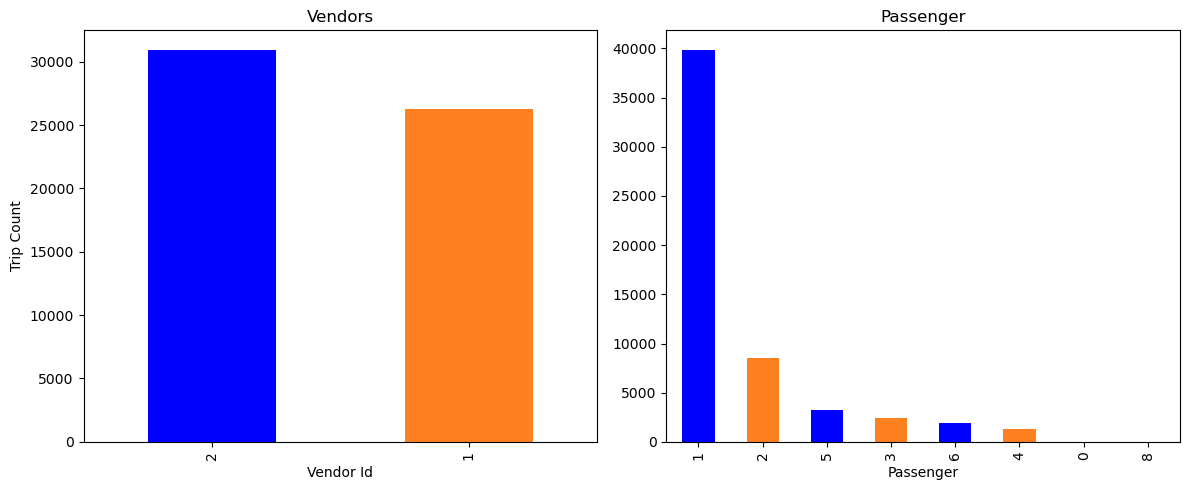

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = taxi_data_cleaned['vendor_id'].value_counts().plot(kind='bar',title="Vendors",ax=axes[0],color = ('blue',(1, 0.5, 0.13)))

ax1= taxi_data_cleaned['passenger_count'].value_counts().plot(kind='bar',title="Passenger",ax=axes[1],color = ('blue',(1, 0.5, 0.13)))
ax.set_ylabel("Trip Count")
ax.set_xlabel("Vendor Id")
ax1.set_xlabel("Passenger")
fig.tight_layout()

Each trip has either vendor id 1 or 0 and number of trips taken by vendor 2 is higher than 1 <br>
Most of the taxi's allows 1 to 4 passengers. Some of the big vehicles allow upto 6 passengers.The data looks legitimate.

### Comparing trips with pickup_district and dropoff_district

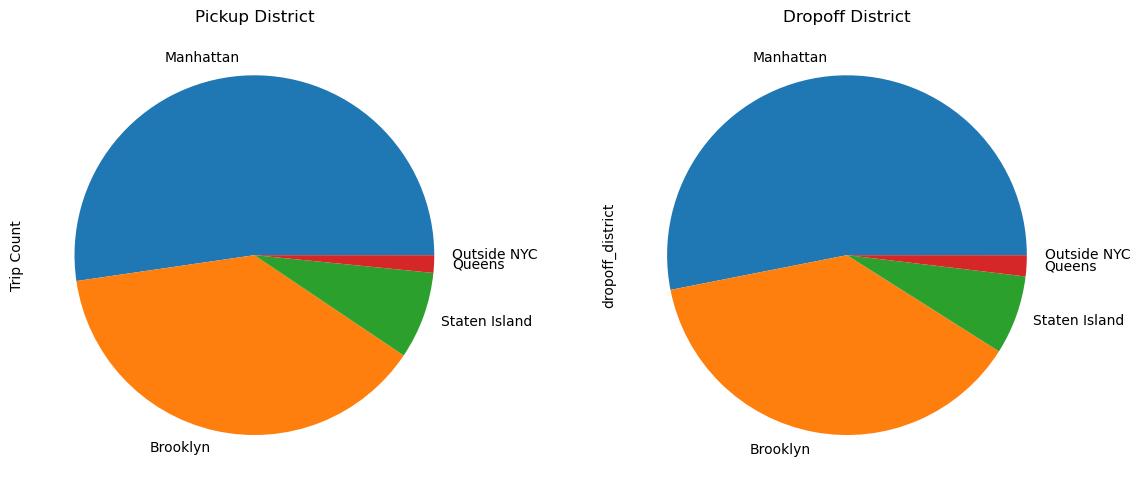

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = taxi_data_cleaned['pickup_district'].value_counts().plot(kind='pie',title="Pickup District",ax=axes[0])
ax1= taxi_data_cleaned['dropoff_district'].value_counts().plot(kind='pie',title="Dropoff District",ax=axes[1])
ax.set_ylabel("Trip Count")
fig.tight_layout()

Most of the pickup and dropoff are Manhatten and Brooklyn districts. Those 2 districts dominates both the trip pickup and dropoff

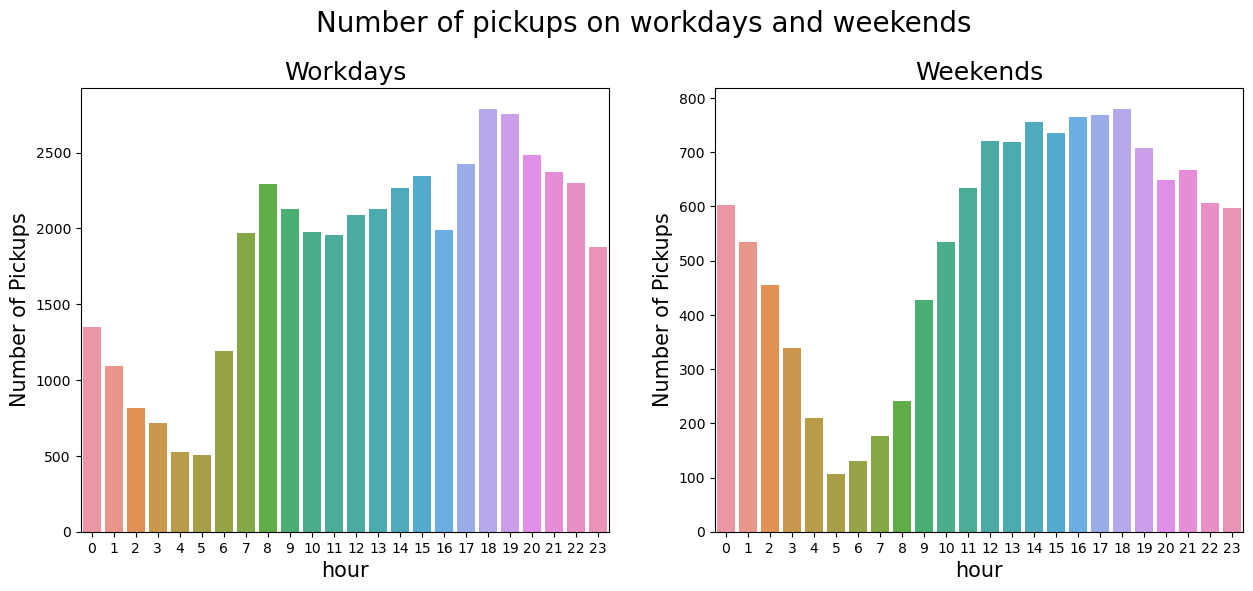

In [14]:
fig, axes = plt.subplots(figsize=(15,6), nrows=1, ncols=2)
workday_trips = taxi_data_cleaned.loc[taxi_data_cleaned['weekday_or_weekend']=='Weekday']
weekend_trips = taxi_data_cleaned.loc[taxi_data_cleaned['weekday_or_weekend']=='Weekend']

sns.countplot(ax=axes[0], x=workday_trips['pickup_hour'])
sns.countplot(ax=axes[1], x=weekend_trips['pickup_hour'])

axes[0].set_title('Workdays',fontsize = 18)
axes[0].set_xlabel('hour', fontsize=15)
axes[0].set_ylabel('Number of Pickups', fontsize=15)
axes[1].set_title('Weekends',fontsize = 18)
axes[1].set_xlabel('hour', fontsize=15)
axes[1].set_ylabel('Number of Pickups', fontsize=15)

fig.suptitle('Number of pickups on workdays and weekends',fontsize = 20)
plt.subplots_adjust(top = 0.85)
plt.show;

We can confirm from the charts above that people use taxi during the weekend more than weekdays.<br>
The trend shows midnight pickups are high during weekends than weekdays.

###### Trip vs Neighborhood Analysis

Lets create 2 new features in the dataset by adding neighborhood and district together.

In [15]:
taxi_data_cleaned['pickup_dist_neigh'] = taxi_data_cleaned['pickup_neighbourhood']+','+ taxi_data_cleaned['pickup_district']
taxi_data_cleaned['dropoff_dist_neigh'] = taxi_data_cleaned['dropoff_neighbourhood']+','+ taxi_data_cleaned['dropoff_district']

In [16]:
pickup_most = taxi_data_cleaned['pickup_dist_neigh'].value_counts(sort=True).nlargest(10)
dropoff_most = taxi_data_cleaned['dropoff_dist_neigh'].value_counts(sort=True).nlargest(10)
print('Top 10 Most Pickup Neighborhoods')
display(pickup_most)
print('Top 10 Most Dropoff Neighborhoods')
display(dropoff_most)

Top 10 Most Pickup Neighborhoods


Upper West Side,Manhattan      7163
Harlem,Manhattan               6297
East Harlem,Manhattan          6104
Bedford-Stuyvesant,Brooklyn    5445
South Slope,Brooklyn           2759
Hell's Kitchen,Manhattan       2207
West Village,Manhattan         2042
Clinton Hill,Brooklyn          1809
Williamsburg,Brooklyn          1780
Fort Greene,Brooklyn           1773
Name: pickup_dist_neigh, dtype: int64

Top 10 Most Dropoff Neighborhoods


Upper West Side,Manhattan      7059
Harlem,Manhattan               6660
East Harlem,Manhattan          6306
Bedford-Stuyvesant,Brooklyn    5036
South Slope,Brooklyn           2612
Hell's Kitchen,Manhattan       2226
Kensington,Brooklyn            2106
West Village,Manhattan         1945
Clinton Hill,Brooklyn          1915
Midtown,Manhattan              1684
Name: dropoff_dist_neigh, dtype: int64

In [17]:
pickup_least = taxi_data_cleaned['pickup_dist_neigh'].value_counts(sort=True).nsmallest(10)
dropoff_least = taxi_data_cleaned['dropoff_dist_neigh'].value_counts(sort=True).nsmallest(10)
print('Top 10 Least Pickup Neighborhoods')
display(pickup_least)
print('Top 10 Least Dropoff Neighborhoods')
display(dropoff_least)

Top 10 Least Pickup Neighborhoods


Financial District,Manhattan    1
New Dorp,Staten Island          1
Ridgewood,Queens                1
Fort Wadsworth,Staten Island    1
Outside NYC,Outside NYC         1
Willowbrook,Staten Island       3
Sunset Park,Brooklyn            3
Breezy Point,Queens             4
Dongan Hills,Staten Island      4
Sea Gate,Brooklyn               4
Name: pickup_dist_neigh, dtype: int64

Top 10 Least Dropoff Neighborhoods


Brownsville,Brooklyn             1
Prospect Heights,Brooklyn        1
Outside NYC,Outside NYC          1
Fort Wadsworth,Staten Island     1
SoHo,Manhattan                   2
Sunset Park,Brooklyn             2
Lighthouse Hill,Staten Island    2
New Dorp,Staten Island           2
St. George,Staten Island         3
Howland Hook,Staten Island       3
Name: dropoff_dist_neigh, dtype: int64

###### Trip distance Vs Trip Duration

<Axes: xlabel='distance', ylabel='trip_duration'>

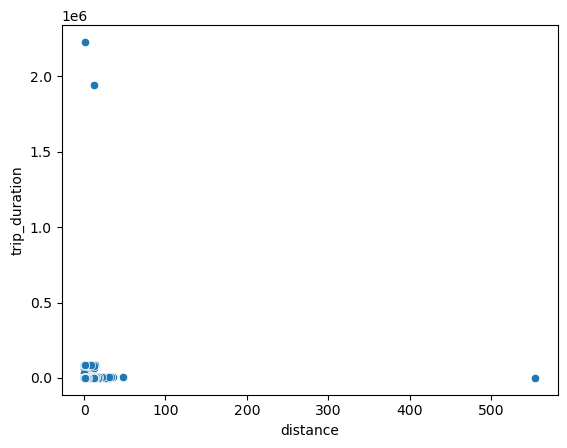

In [18]:
sns.scatterplot(data=taxi_data_cleaned, x="distance", y="trip_duration")

The plot shows some outliers in the distance and trip_duration field

In [19]:
print(taxi_data_cleaned['trip_duration'].min())
print(taxi_data_cleaned['trip_duration'].max())
print(taxi_data_cleaned['trip_duration'].mean())
taxi_data_cleaned[taxi_data_cleaned['trip_duration']>5000].shape[0]

1.0
2227612.0
941.6869176034546


113

In [20]:
print(taxi_data_cleaned['distance'].min())
print(taxi_data_cleaned['distance'].max())
print(taxi_data_cleaned['distance'].mean())
taxi_data_cleaned[taxi_data_cleaned['distance']>30].shape[0]

0.0
554.0541843362436
2.164837098775131


7

Remove trips with trip_duration over 1000 and distance over 10 miles

In [21]:
taxi_data_cleaned = taxi_data_cleaned[(taxi_data_cleaned['distance']<10) & (taxi_data_cleaned['trip_duration']<1000)]

In [22]:
taxi_data_cleaned.shape[0]

44161

Chart after removing outliers in distance and trip_duration


<Axes: xlabel='distance', ylabel='trip_duration'>

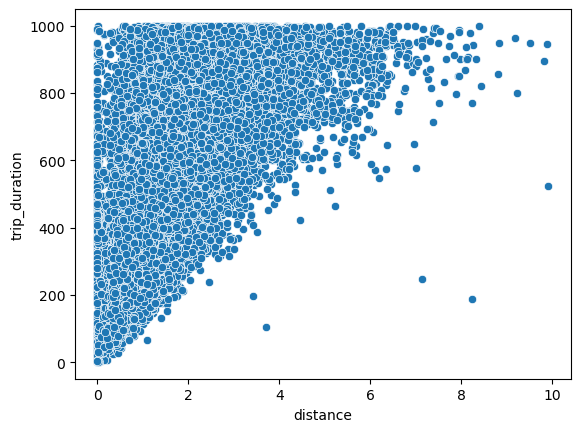

In [23]:
sns.scatterplot(data=taxi_data_cleaned, x="distance", y="trip_duration")

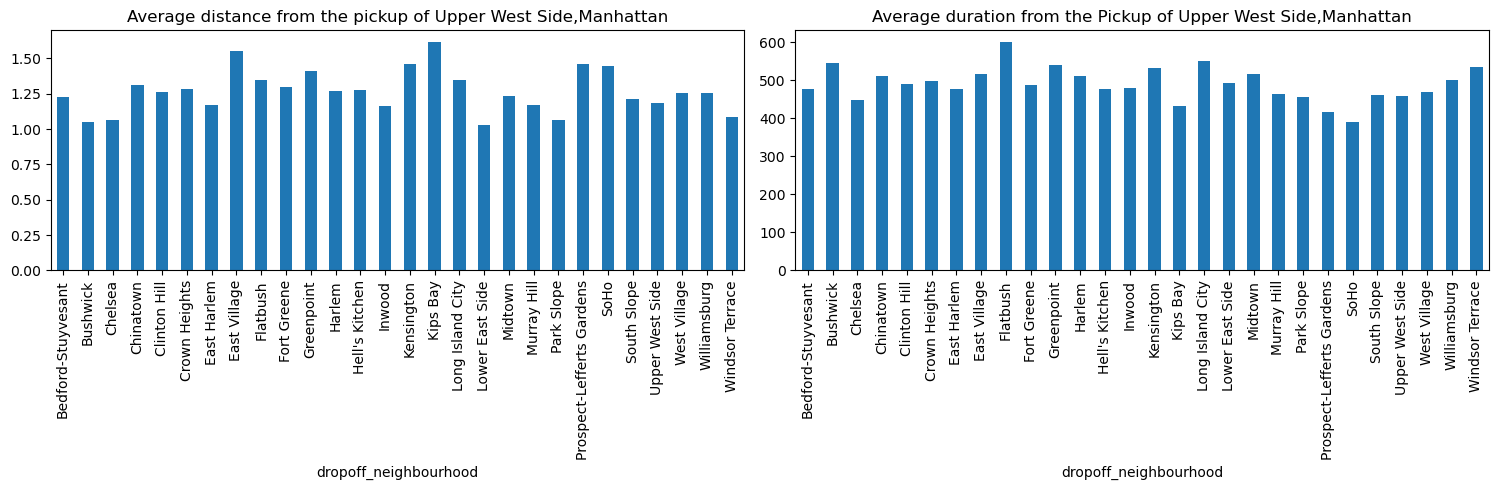

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
grp_by_pickup = taxi_data_cleaned[taxi_data_cleaned['pickup_dist_neigh']=='Upper West Side,Manhattan']\
                .groupby('dropoff_neighbourhood')['distance'].mean().plot(kind='bar',\
                title="Average distance from the pickup of Upper West Side,Manhattan",ax=axes[0])
grp_by_pickup = taxi_data_cleaned[taxi_data_cleaned['pickup_dist_neigh']=='Upper West Side,Manhattan']\
                .groupby('dropoff_neighbourhood')['trip_duration'].mean().plot(kind='bar',\
                title="Average duration from the Pickup of Upper West Side,Manhattan",ax=axes[1])
ax.set_ylabel("Trip Distance in miles")
ax.set_xlabel("DropOff Neighborhood")
ax1.set_xlabel("DropOff Neighborhood")
ax1.set_ylabel("Trip duration in seconds")
fig.tight_layout()


The trip distance of SoHo looks almost 1.4 miles and Prospect-Lefferts Gardens almost 1.3miles. But the trip duration for Soho is shorter than Prospect-Lefferts Gardens which could be the traffic zone.

###### Lets use labelencoder() to convert the categorical data into numerical field

In [25]:
for col in taxi_data_cleaned.columns:
   # if taxi_data_cleaned[col].dtype == object and col not in ['id','pickup_datetime','dropoff_datetime','pickup_neighbourhood','dropoff_neighbourhood']:
     if taxi_data_cleaned[col].dtype == object and col not in ['id','pickup_datetime','dropoff_datetime']:
     
        taxi_data_cleaned[col] = LabelEncoder().fit_transform(taxi_data_cleaned[col])


###### Correlation Matrix

<Axes: >

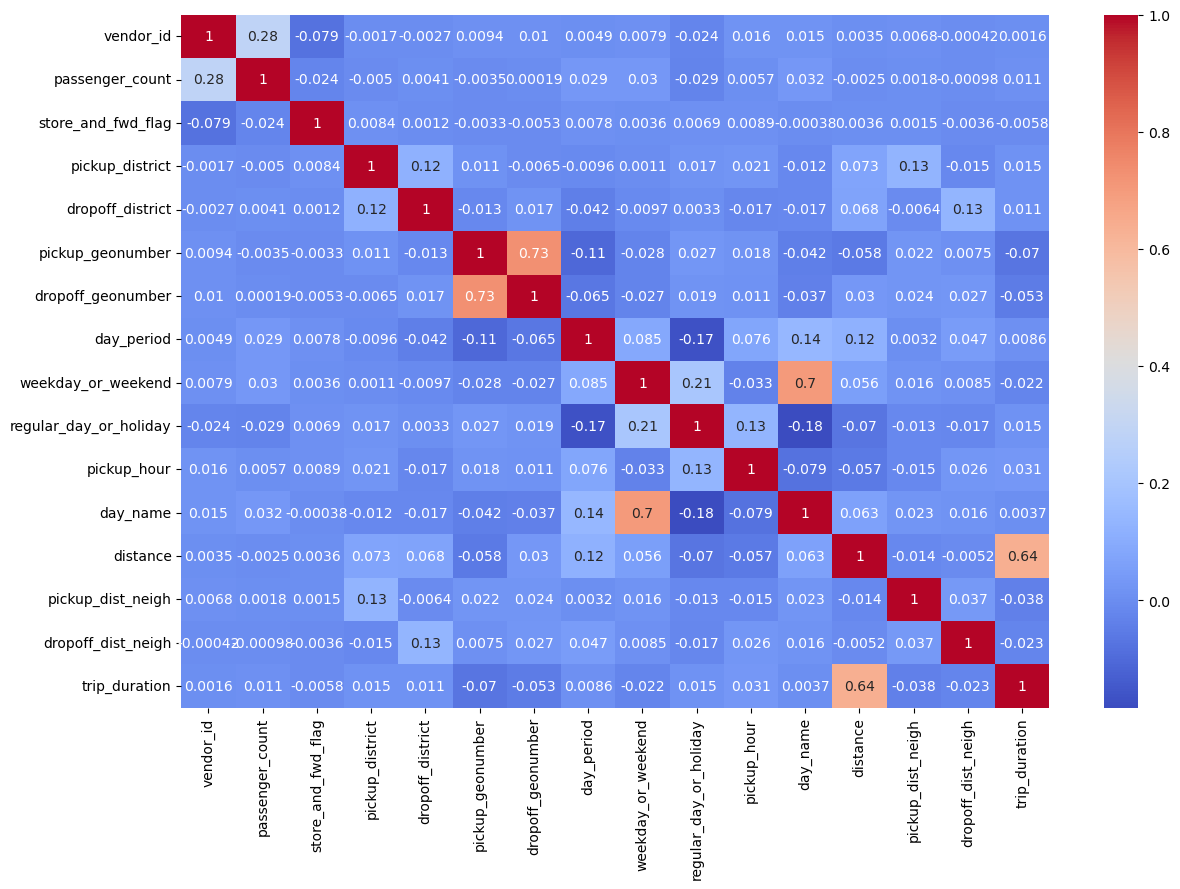

In [26]:
corr = taxi_data_cleaned.iloc[:, [2, 5,10, 12,14,16,17,18,22,23,24,25,27,28,29,11]].corr(method='pearson')
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Distance field is positively correlated to the trip_duration. All the other fields show very less correlation.

In [27]:
#Shrinking the data to just one day
taxi_1day = taxi_data_cleaned[(taxi_data_cleaned['pickup_datetime']>='2016-01-01 00:00:00') & (taxi_data_cleaned['pickup_datetime']<='2016-01-02 00:00:00')]
taxi_1day.shape[0]
#taxi_1day.info()

5494

### Feature Selection


In [28]:
#Split the data into training and test
df = taxi_1day.copy()
df_final = df.drop(['pickup_datetime','dropoff_datetime','id','Unnamed: 0'],axis=1)
x = df_final.drop('trip_duration',axis=1)#df.iloc[:, [2, 5,10, 12,14,16,17,18,22,23,24,25,28,29,27]].values
y = df_final['trip_duration']#df.iloc[:,11].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 7294)
# Z-score the features
scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)

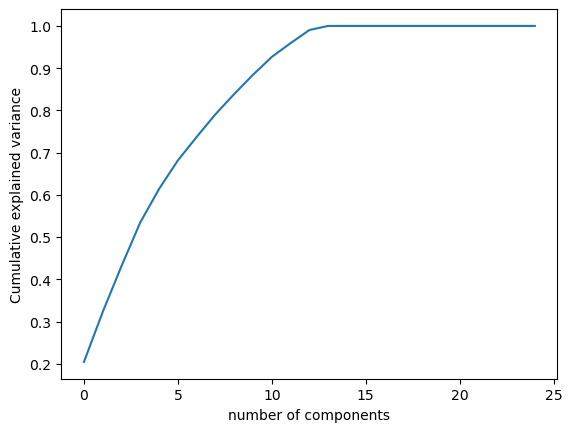

In [29]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [30]:
# The PCA model
pca = PCA(n_components=14)
X_new = pca.fit_transform(X_scaled) 

In [31]:
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
list(zip(range(1,len(arr)), arr))

[(1, 20.43),
 (2, 32.269999999999996),
 (3, 43.14),
 (4, 53.49),
 (5, 61.400000000000006),
 (6, 68.16000000000001),
 (7, 73.71000000000001),
 (8, 79.08000000000001),
 (9, 83.87000000000002),
 (10, 88.43000000000002),
 (11, 92.66000000000003),
 (12, 95.92000000000003),
 (13, 99.02000000000002)]

In [32]:
# Create feature set (X) and target variable (y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

selector = SequentialFeatureSelector(LinearRegression() ,n_features_to_select=14, direction='forward', 
                                     scoring="neg_mean_squared_error", 
                                     cv=5)

selector.fit_transform(X_train,y_train)
feature_names =x.columns
feature_names[selector.get_support()]

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_district', 'dropoff_neighbourhood', 'dropoff_geonumber',
       'day_period', 'month', 'year', 'pickup_hour', 'day_name',
       'financial_quarter', 'distance'],
      dtype='object')

We only need 14 features to get 99.98% accuracy. 

###### Model 

In [33]:
df_final = taxi_1day.copy()
df_final = pd.DataFrame(df_final[['vendor_id', 'pickup_longitude', 'pickup_latitude', 'dropoff_district',
       'pickup_geonumber', 'dropoff_geonumber', 'day_period', 'month', 'year',
       'pickup_hour', 'day_name', 'distance', 'pickup_dist_neigh',
       'dropoff_dist_neigh','trip_duration']])
# Create feature set (X) and target variable (y)
X = df_final.drop('trip_duration', axis = 1)
y = df_final['trip_duration']
#print(X.info())


In [34]:
#Splitting the dataset intoo training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
modresults_class = []
modresults_regre = []

###### Regression Models

In [36]:
#Lasso Model
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import math
lasso_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', linear_model.Lasso(random_state = 42))])
lasso_pipe.fit(X_train, y_train)
#lasso_coefs = lasso_pipe.named_steps['lasso'].coef_

y_pred_lasso = lasso_pipe.predict(X_test)
    
#Errors Metrics
mse = metrics.mean_squared_error(y_pred_lasso,y_test)
rmse = math.sqrt(mse)
mae = metrics.mean_absolute_error(y_pred_lasso,y_test)
modresults_regre.append({"Model": 'Lasso Regressor', 
                        "MSE": mse, 
                        "RMSE":rmse, 
                         "MAE":mae,
                        "Test Accuracy": lasso_pipe.score(X_test,y_test)})

In [37]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

    
#Errors Metrics
rf_mse = metrics.mean_squared_error(y_pred_rf,y_test)
rf_rmse = math.sqrt(mse)
rf_mae = metrics.mean_absolute_error(y_pred_rf,y_test)
modresults_regre.append({"Model": 'Random Forest Regressor', 
                        "MSE": rf_mse, 
                        "RMSE":rf_rmse, 
                         "MAE":rf_mae,
                        "Test Accuracy": random_forest.score(X_test,y_test)})

In [38]:

tree = DecisionTreeRegressor(max_depth=5,max_features=13)
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)
#Errors Metrics
tree_mse = metrics.mean_squared_error(predictions,y_test)
tree_rmse = math.sqrt(mse)
tree_mae = metrics.mean_absolute_error(predictions,y_test)
modresults_regre.append({"Model": 'Decision Tree Regressor', 
                        "MSE": tree_mse, 
                        "RMSE":tree_rmse, 
                         "MAE":tree_mae,
                        "Test Accuracy": tree.score(X_test,y_test)})

###### Classification Models

In [39]:
df_class = taxi_1day.copy()

df_class = pd.DataFrame(df_final[['vendor_id', 'pickup_longitude', 'pickup_latitude', 'dropoff_district',
       'pickup_geonumber', 'dropoff_geonumber', 'day_period', 'month', 'year',
       'pickup_hour', 'day_name', 'distance', 'pickup_dist_neigh',
       'dropoff_dist_neigh','trip_duration']])

print(df_class['trip_duration'].min(),df_class['trip_duration'].max(),df_class['trip_duration'].mean())
df_class['trip_category'] = 'low'
 
df_class['trip_category'] = pd.cut(
    x=df["trip_duration"],
    bins=[1, 350, 700, np.inf],
    labels=["low", "medium", "high"],
)
#df_class.info()
#print(df_class[df_class['trip_category'] =='low'])

# Create feature set (X) and target variable (y)
X_cls = df_class.drop(['trip_duration','trip_category'], axis = 1)
y_cls = df_class['trip_category']
#print(X.info())


3.0 999.0 491.9650527848562


In [40]:

pipe_lr = Pipeline([('scl', StandardScaler()),
                        ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                        ('DT',DecisionTreeClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                        ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('scl', StandardScaler()),
                         ('SVM', svm.SVC(random_state=42))])

In [41]:
#Splitting the dataset into training and test
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=1)

In [42]:
param_range = [1, 2, 3, 4, 5, 6]
n_estimators = [50,100,150]

In [43]:
lr_param_grid = [{'LR__penalty': ['l1', 'l2']},
                   {'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]

knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 
                    'SVM__C': param_range}]

In [44]:
#Build GridSearchCV for the models
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=3)

knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=3)
svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring='accuracy',
        cv=3)

In [45]:
grids = [lr_grid_search, dt_grid_search, knn_grid_search, svm_grid_search]
for pipe in grids:
    pipe.fit(X_train_cls,y_train_cls)

In [46]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'K-Nearest Neighbors', 
             3: 'Support Vector Machines'}
for i, model in enumerate(grids):
    # Append to results
    modresults_class.append({"Model": grid_dict[i], 
                        "Train Time": min(model.cv_results_['mean_fit_time']), 
                        "Train Accuracy": model.score(X_train_cls,y_train_cls), 
                        "Test Accuracy": model.score(X_test_cls,y_test_cls)})

###### Classification Model Metrices

In [47]:
print(pd.DataFrame(modresults_class))

                     Model  Train Time  Train Accuracy  Test Accuracy
0      Logistic Regression    0.003320        0.683049       0.666060
1           Decision Trees    0.003762        0.688737       0.667880
2      K-Nearest Neighbors    0.002633        1.000000       0.609645
3  Support Vector Machines    0.120591        0.687600       0.666060


###### Regression Model Metrics

In [48]:
print(pd.DataFrame(modresults_regre))

                     Model           MSE        RMSE         MAE  \
0          Lasso Regressor  23666.864541  153.840387  120.241903   
1  Random Forest Regressor  22320.574582  153.840387  115.734340   
2  Decision Tree Regressor  24597.951799  153.840387  121.579968   

   Test Accuracy  
0       0.585006  
1       0.608613  
2       0.568680  


# Conclusion

When comparing the test accuracy of the Regression models with Classification Models, Classification models prediction is better than Regression models. 
Logistic Regression,Decision Trees and SVM almost predicted the same result. KNN looks overfitted in the training dataset.
Decision Tree performed better in the Regression models.
Finally, With the proper tuning of Hyperparameter we can improve these models performance in the future. 
My recommendation is to use Logistic Regression in classification model and use Decision tree for Regression Model.